[IRIS 꽃받침 길이, 너비, 꽃잎 길이 기반 꽃잎 너비 예측 모델 + 교차 검증]
- 데이터셋 : Iris
- 학습종류: 지도학습 / 회귀(Regression)
- 알고리즘: 분석 후 결정
- 피쳐: 꽃받침 길이, 꽃받침 너비, 꽃잎 길이 ==> 다변량
- 타겟: 꽃잎 너비
- 검증: 5개 교차 검증

[1] 모듈 로딩 및 데이터 준비

In [72]:
#[1-1] 모듈 로딩

import pandas as pd		# 데이터 분석 및 전처리용 모듈
import matplotlib.pyplot as plt  # 데이터 시각화
import numpy as np
import koreanize_matplotlib
from sklearn.model_selection import train_test_split # 학습용 /검증용 / 테스트용 데이터 분리 및 처리용 모듈
from sklearn.model_selection import KFold	# 교차검증

In [73]:
# 데이터 준비

irisDF = pd.read_csv('../Data/iris.csv', usecols=[0,1,2,3])

irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


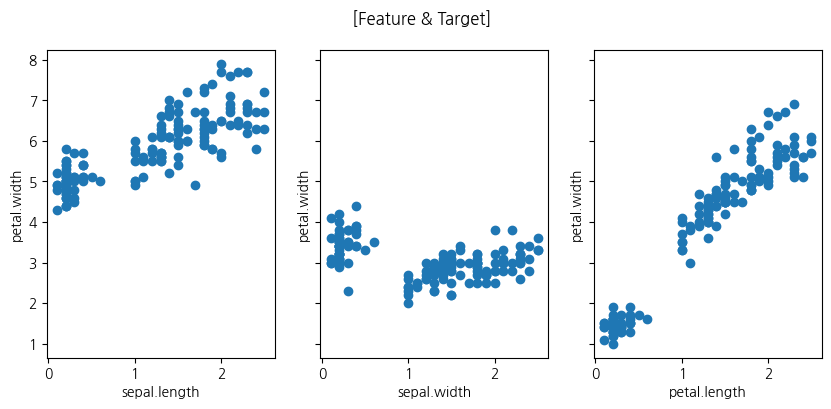

In [74]:
fig , axes = plt.subplots(1, 3, sharey=True, figsize=(10,4))

axes = axes.flatten()
titles = irisDF.columns[:-1]

for title, ax in zip(titles, axes):
    ax.scatter(irisDF['petal.width'], irisDF[title])
    ax.set_xlabel(title)
    ax.set_ylabel('petal.width')

plt.suptitle('[Feature & Target]')
plt.show()

In [75]:
irisDF.corr()['petal.width']

sepal.length    0.817941
sepal.width    -0.366126
petal.length    0.962865
petal.width     1.000000
Name: petal.width, dtype: float64

- 탐색적 분석의 결과
	* 데이터 분포 분석 : 길이에 따른 너비가 증가하는 양상 보임
	* 주의 : 품종에 따라서 길이가 모여 있음
	* 알고리즘 : 선형회귀로 진행

[3] 데이터 셋 준비
- 학습용 데이터 셋: 학습에만 사용 > 해당 데이터셋에서 피쳐와 타겟의 규칙 / 패턴 탐색
- 검증용 데이터 셋: 학습 중 규칙 / 패턴 제대로 학습 여부 검사
- 테스트용 데이터 셋: 모델 완성 후 테스트용 데이터 셋
- sklearn 패키지 특성으로 학습용과 테스트용만 사용

In [76]:
irisDF.columns[:-1:2]

Index(['sepal.length', 'petal.length'], dtype='object')

In [77]:
# [3-1] 피쳐와 타겟 분리
featureDF = irisDF[irisDF.columns[:-1:2]]
targetSR = irisDF[irisDF.columns[-1]]

print(f" featureDF > {featureDF.ndim}D shape > {featureDF.shape}")
print(f" targetSR > {targetSR.ndim}D shape > {targetSR.shape}")


 featureDF > 2D shape > (150, 2)
 targetSR > 1D shape > (150,)


In [78]:
# [3-2]데이터 분리
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=5)

In [79]:
print(f'X_train => {X_train.ndim}D,   {X_train.shape}')
print(f'X_test => {X_test.ndim}D,   {X_test.shape}')

print(f'y_train => {y_train.ndim}D,   {y_train.shape}')
print(f'y_test => {y_test.ndim}D,   {y_test.shape}')


X_train => 2D,   (112, 2)
X_test => 2D,   (38, 2)
y_train => 1D,   (112,)
y_test => 1D,   (38,)


[4] 학습 진행 <hr>

In [80]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression # 알고리즘 모듈
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error # 성능평가 관련 모듈
 

In [81]:
# 교차검증 객체 생성 -5개 분할 [기본]

kf = KFold()

# 선형회귀 모델 객체 생성
lr = LinearRegression()

In [82]:
score_total = 0
loss_total = 0 
resultDF = pd.DataFrame(columns=['score','loss'])
# 교차검증으로 학습 및 검증 진행
for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
	print(f"Fold {i}:")
	# print(f"  Train: index={train_index}")
	# print(f"  Test:  index={test_index}")

	# -학습용/테스트용 피쳐와 타겟 추출
	train_data, train_label = X_train.iloc[train_index], y_train.iloc[train_index]
	test_data, test_label = X_train.iloc[test_index], y_train.iloc[test_index]

	# 학습
	lr.fit(train_data, train_label)
	# 성능평가
	train_score = lr.score(train_data, train_label)
	test_score = lr.score(test_data,test_label)

	# - 손실계산
	train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
	test_loss = root_mean_squared_error(test_label,lr.predict(test_data))

	# 성능평가 평균
	# mean_score = np.mean(train_score)
	# mean_test_score = np.mean(test_score)

	# print(f"평균 R² Score: {mean_score:.4f}")
	# print(f"평균 R² test_Score: {mean_test_score:.4f}")
	# # - 손실계산 평균


	# # mean_train_loss = np.mean(train_loss)
	# # mean_test_loss = np.mean(test_loss)

	
	# print(f"손실계산 평균 train_loss: {mean_train_loss:.4f}")
	# print(f"손실계산 평균 test_loss: {mean_test_loss:.4f}")
	# # - 손실계산 평균

	score_total += train_score
	loss_total += train_loss
	resultDF.loc[f'Train_{i}'] = [train_score,train_loss]
	resultDF.loc[f'Test_{i}'] = [test_score,test_loss]

print(f"Train_score 평균 {score_total/5}")
print(f"loss_score 평균 {loss_total/5}")


Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
Train_score 평균 0.9340770808507808
loss_score 평균 0.1967836198402203


In [83]:
resultDF

,score,loss
Train_0,0.929040,0.206799
Test_0,0.952007,0.159257
Train_1,0.934252,0.197708
Test_1,0.926494,0.201774
Train_2,0.933911,0.199943
Test_2,0.921272,0.197981
Train_3,0.935083,0.187714
Test_3,0.928550,0.234858
Train_4,0.938099,0.191755
Test_4,0.907423,0.227644


In [84]:
Train_score_sum = 0
Test_score_sum = 0
for i in resultDF.index :
	if i in 'Train':
		Train_score_sum += resultDF.loc[i,'score']
	else :
		Test_score_sum += resultDF.loc[i,'score']

print( Train_score_sum/5 ,   Test_score_sum/5)

0.0 1.8612264006155819


In [85]:
X_train.iloc[:4]

,sepal.length,petal.length
40,5.0,1.3
115,6.4,5.3
142,5.8,5.1
69,5.6,3.9


In [86]:
resultDF = pd.DataFrame(columns=['score','loss'])
resultDF

,score,loss


In [87]:
resultDF.loc['fold1'] = [0,0]
resultDF

,score,loss
fold1,0,0


[5] 테스트 수행<hr>

In [88]:
from sklearn.metrics import r2_score

In [89]:
pred_y  = lr.predict(X_test)

pred_y 

# 평가
score = r2_score(y_test,pred_y)
rmse = root_mean_squared_error(y_test,pred_y)

print(score, rmse)


0.9123566754120594 0.21833534076765107


[6] 모델 활용/ 서비스 <hr>

In [ ]:
# 사용자로 부터 입력 받기
print('꽃받침 길이랑 넓이 조회 ')
new_data =  input(' 입력 (예: 3.4,7.9) :').split(',')
print(new_data)

new_data = [float(data) for data in new_data]

print(new_data)

품종 조회 
['5.5', '8.8']
[5.5, 8.8]


In [ ]:
# 예측 결과 출력
data_DF = pd.DataFrame([new_data], columns=['sepal.length','petal.length'])
#print(lr.predict([new_data]))
print(lr.predict(data_DF))

[3.39429083]
[3.39429083]


c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
